In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [6]:
ratio = [0.2]

# for fmnist
seed = [12]

# form mnist
#seed = [12]

noniid = 0.4
where='fmnist'
where_origin='fmnist_origin'
epoch = 20


mean_good = [0 for i in range(epoch)]
mean_normal = [0 for i in range(epoch)]
mean_bad = [0 for i in range(epoch)]

std_good = [0 for i in range(epoch)]
std_normal = [0 for i in range(epoch)]
std_bad = [0 for i in range(epoch)]

min_good = [0 for i in range(epoch)]
min_normal = [0 for i in range(epoch)]
min_bad = [0 for i in range(epoch)]

max_good = [0 for i in range(epoch)]
max_normal = [0 for i in range(epoch)]
max_bad = [0 for i in range(epoch)]

for e in range(4):
    mean_good[e] = 0
    mean_normal[e] = 1000*ratio[0]/10
    mean_bad[e] = 0
    
    max_good[e] = mean_good[e] + std_good[e]
    min_good[e] = mean_good[e] - std_good[e]    
    max_normal[e] = mean_normal[e] + std_normal[e]
    min_normal[e] = mean_normal[e] - std_normal[e]
    max_bad[e] = mean_bad[e] + std_bad[e]
    min_bad[e] = mean_bad[e] - std_bad[e]

for e in range(4,epoch):
    group = [[] for i in range(len(seed))]
    each_round = [[] for i in range(len(seed))]
    rec_order_good = [[] for i in range(len(seed))]
    rec_order_normal = [[] for i in range(len(seed))]
    rec_order_bad = [[] for i in range(len(seed))]
    rec_sum_good = [0 for i in range(len(seed))]
    rec_sum_normal = [0 for i in range(len(seed))]
    rec_sum_bad = [0 for i in range(len(seed))]

    
    for s in range(len(seed)):
        path = './' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(ratio[0]) + '/num.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(e*10,(e+1)*10):
                each_round[s].append(lines[line])
        
        path = './' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(ratio[0]) + '/client.txt'
        with open(path) as f:
            lines = f.readlines()
            group[s].append(lines[e*3])
            group[s].append(lines[e*3+1])
            group[s].append(lines[e*3+2])
        
        
        for i in range(len(each_round[0])):
            each_round[s][i] = each_round[s][i].split(" ")[1]
            each_round[s][i] = int(each_round[s][i].split("/")[0])

        for i in range(len(group[0])):
            group[s][i] = group[s][i].split(":")[1]
            group[s][i] = eval(group[s][i])
        
        
        for g in group[s][0]:
            rec_order_good[s].append(each_round[s][g])
            rec_order_good[s].sort()
        for g in group[s][1]:
            rec_order_normal[s].append(each_round[s][g])
            rec_order_normal[s].sort()
        for g in group[s][2]:
            rec_order_bad[s].append(each_round[s][g])
            rec_order_bad[s].sort()
    
        if len(rec_order_good[s]) > 0:
            rec_sum_good[s] = np.sum(rec_order_good[s])/4
        else:
            rec_sum_good[s] = 0
    
        if len(rec_order_normal[s]) > 0:
            rec_sum_normal[s] = np.sum(rec_order_normal[s])/3
        else:
            rec_sum_normal[s] = 0
        
        if len(rec_order_bad[s]) > 0:
            rec_sum_bad[s] = np.sum(rec_order_bad[s])/3
        else:
            rec_sum_bad[s] = 0

        
    mean_good[e] = np.mean(rec_sum_good,0)
    std_good[e] = np.std(rec_sum_good,0)
    max_good[e] = mean_good[e] + std_good[e]
    min_good[e] = mean_good[e] - std_good[e]
    
    if(np.max(rec_sum_good,0)<max_good[e]):
        max_good[e] = np.max(rec_sum_good,0)
    if(np.min(rec_sum_good,0)>min_good[e]):
        min_good[e] = np.min(rec_sum_good,0)
    
    mean_normal[e] = np.mean(rec_sum_normal,0)
    std_normal[e] = np.std(rec_sum_normal,0)
    max_normal[e] = mean_normal[e] + std_normal[e]
    min_normal[e] = mean_normal[e] - std_normal[e]
    
    if(np.max(rec_sum_normal,0)<max_normal[e]):
        max_normal[e] = np.max(rec_sum_normal,0)
    if(np.min(rec_sum_normal,0)>min_normal[e]):
        min_normal[e] = np.min(rec_sum_normal,0)
    
    
    mean_bad[e] = np.mean(rec_sum_bad,0)
    std_bad[e] = np.std(rec_sum_bad,0)
    max_bad[e] = mean_bad[e] + std_bad[e]
    min_bad[e] = mean_bad[e] - std_bad[e]

    if(np.max(rec_sum_bad,0)<max_bad[e]):
        max_bad[e] = np.max(rec_sum_bad,0)
    if(np.min(rec_sum_bad,0)>min_bad[e]):
        min_bad[e] = np.min(rec_sum_bad,0)
    

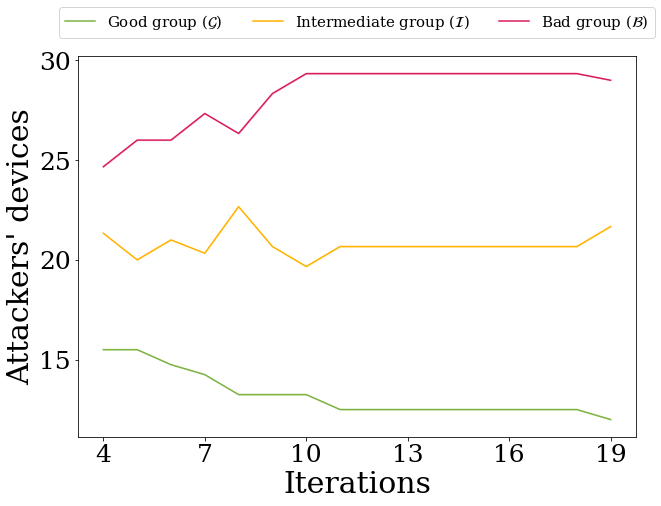

In [7]:
round = [i for i in range(4,20)]
fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlabel("Iterations",fontsize=30)
ax.set_ylabel("Attackers' devices",fontsize=30)
ax.set_xticks([4,7,10,13,16,19])
ax.tick_params(labelsize=25)

ax.plot(round, mean_good[4:], c = '#7CB342', label='Good group ' + r'($\mathcal{G}$)')
ax.fill_between(round, max_good[4:], min_good[4:], color = '#C5E1A5', alpha=0.4)


ax.plot(round, mean_normal[4:], c = '#FFB300', label='Intermediate group ' + r'($\mathcal{I}$)')
ax.fill_between(round, max_normal[4:], min_normal[4:], color = '#FFE57F', alpha=0.4)


ax.plot(round, mean_bad[4:], c = '#D81B60', label='Bad group ' + r'($\mathcal{B}$)')
ax.fill_between(round, max_bad[4:], min_bad[4:], color = '#F48FB1', alpha=0.4)

ax.legend(loc='upper center',bbox_to_anchor =(0.5, 1.15),ncol=4,fontsize=15)
